<a href="https://colab.research.google.com/github/fengfrankgthb/Demonstrations/blob/main/LIT_CeO2_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Showing text embeddings 2025.05.18

## 1. Install Necessary Libraries
* **sentence-transformers** This is the text embedding library
* **scikit-learn** This is the machine learning library
* **matplotlib** This is the mat-lab style plotting library

In [1]:
!pip install sentence-transformers scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

## 2. import necessary modules from the libraries



In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

# set matplot to inline (static) mode, or notebook for interactive mode)
# even though default is inline mode, be explicit to avoid any confusion
%matplotlib inline

## 3. Imput text data

Used *118HHH Q1 on CeO2-NPs* for illustration, breaking into 9 components:

* Pa = All Sentences combined in Prompt
* P1 = 1st sentence in Prompt
* P2 = 2nd sentence in Prompt
* P3 = 3rd sentence in Prompt
* Q? = the Question sentence
* Ax = wrong choice A
* Bv = correct answer B
* Cx = wrong choice C
* Dx = wrong choice D

In [53]:
sentences = ["Pa: Some fuel additives contain cerium oxide nanoparticles (CeO2-NPs), which can leach into waterways and soils via waste water. In a 2015 study Mael Garaud and colleagues found that CeO2-NPs can accumulate in the bodies of zebra mussels (Dreissena polymorpha). While bioaccumulation of manufactured nanoparticles may be inherently worrisome, it has been hypothesized that CeO2-NPs bioaccumulation in invertebrate like D. polymorpha could serve a valuable proxy role, observing the need for manufacturers to conduct costly and intrusive sampling of vertebrate species--such as rainbow trout (Oncorhynchus mykiss), commonly used in regulatory compliance testing--for manipulative bioaccumulation, as environmental protection laws currently require.",
    "P1: Some fuel additives contain cerium oxide nanoparticles (CeO2-NPs), which can leach into waterways and soils via waste water.",
    "P2: In a 2015 study Mael Garaud and colleagues found that CeO2-NPs can accumulate in the bodies of zebra mussels (Dreissena polymorpha).",
    "P3: While bioaccumulation of manufactured nanoparticles may be inherently worrisome, it has been hypothesized that CeO2-NPs bioaccumulation in invertebrate like D. polymorpha could serve a valuable proxy role, observing the need for manufacturers to conduct costly and intrusive sampling of vertebrate species--such as rainbow trout (Oncorhynchus mykiss), commonly used in regulatory compliance testing--for manipulative bioaccumulation, as environmental protection laws currently require.",
    "Q?: Which finding, if true, would most directly weaken the hypothesis presented in the text?",
    "Ax) When D. polymorpha and O. mykiss are exposed to similar levels of CeO2-NPs, concentrations of CeO2-NPs in animals of both species show little variation from individual to individual.",
    "Bv) The rate of CeO2-NPs uptake in D. polymorpha differs from the rate of CeO2-NPs uptake in O. mykiss in a way that is not yet well understood by researchers.",
    "Cx) D.polymorpha has been shown to accumulate several other types of manufactured nanoparticles in addition to CeO2-NPs, whereas O. mykiss has been shown to accumulate only CeO2-NPs.",
    "Dx) Compared with O. mykiss, D.polymorpha can accumulate detectable CeO2-NPs concentrations with significantly fewer negative effects."
]

## 4. Generate Embedding on SAT-CeO2 Sample Sentences.

Used a pre-trained Sentence Transformer model, `all-mpnet-base-v2`, to generate embeddings for each sentence. This model is a good general-purpose choice, with mapping of sentences & paragraphs to a 768 dimensional dense vector space and can be used for tasks like clustering or semantic search.

In [54]:
# Load the pre-trained model
model = SentenceTransformer('all-mpnet-base-v2')

# Generate the embeddings
embeddings = model.encode(sentences)

print("Shape of embeddings:", embeddings.shape)
print("Example embedding (first sentence):\n", embeddings[0][:20]) # Print the first 20 dimensions

Shape of embeddings: (9, 768)
Example embedding (first sentence):
 [ 0.01311721  0.04682481 -0.01610916 -0.06537693 -0.0207592   0.00368772
  0.01451678  0.01507424  0.01200456 -0.02659478 -0.02420882  0.05405664
  0.01482707  0.0146602   0.02766617  0.01475706  0.04501006 -0.00233948
  0.03254052  0.00490344]


## 5. Reduce dimensionality into 2D with PCA

**PCA** = principal component analysis.

Principal Components are composite dimensions from the existing 768-dimention embedding dataset. It helps to reduce dimensions while maintaning the most variances mathematically, thus being able to discern the most of datapoints. The ability to discern things is simply the intelligence, or smartness.

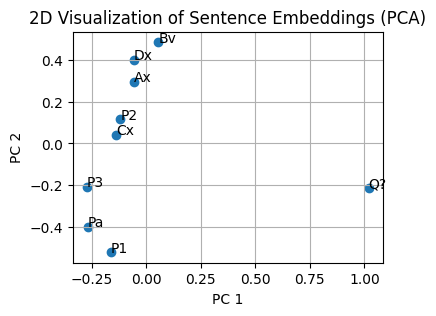

In [56]:
# Reduce to 2 dimensions using PCA
pca_2d = PCA(n_components=2)
reduced_embeddings_2d = pca_2d.fit_transform(embeddings)

# Visualize the 2D embeddings
plt.figure(figsize=(4, 3))
plt.scatter(reduced_embeddings_2d[:, 0], reduced_embeddings_2d[:, 1])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    plt.annotate(txt[:2], (reduced_embeddings_2d[i, 0], reduced_embeddings_2d[i, 1]))

plt.title("2D Visualization of Sentence Embeddings (PCA)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.grid(True)
plt.show()

## 6. Reduce Dimensionality to 3D using PCA

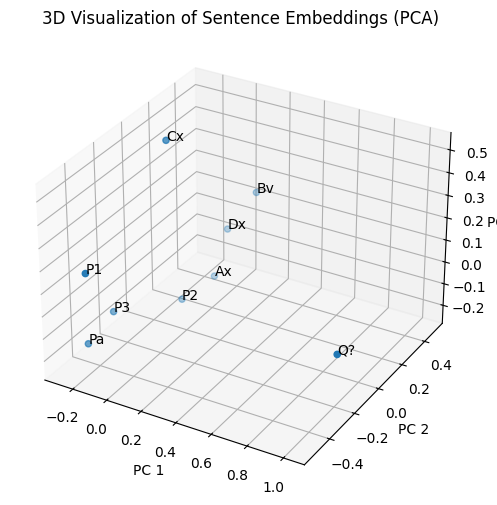

In [57]:
# Reduce to 3 dimensions using PCA
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

# Visualize the 3D embeddings
fig_3d = plt.figure(figsize=(8, 6))
ax_3d = fig_3d.add_subplot(111, projection='3d')
scatter_3d = ax_3d.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    ax_3d.text(reduced_embeddings_3d[i, 0], reduced_embeddings_3d[i, 1], reduced_embeddings_3d[i, 2], txt[:2])

ax_3d.set_xlabel("PC 1")
ax_3d.set_ylabel("PC 2")
ax_3d.set_zlabel("PC 3")
ax_3d.set_title("3D Visualization of Sentence Embeddings (PCA)")
plt.show()

In [58]:
import plotly.graph_objects as go

# Reduce to 3 dimensions using PCA
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

labels = [s[:2] for s in sentences] #get first two letters.

# Create the 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_embeddings_3d[:, 0],
    y=reduced_embeddings_3d[:, 1],
    z=reduced_embeddings_3d[:, 2],
    mode='markers+text',
    text=labels,  # Use first 2 characters of labels
    textposition="middle right",
    marker=dict(size=8),
)])

# Set the title and axis labels
fig.update_layout(
    title="3D PCA Visualization",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
    ),
    margin=dict(l=0, r=0, b=0, t=0),
)

# Show the plot
fig.show()


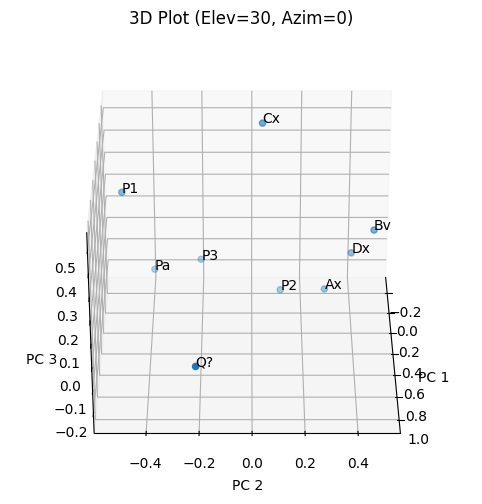

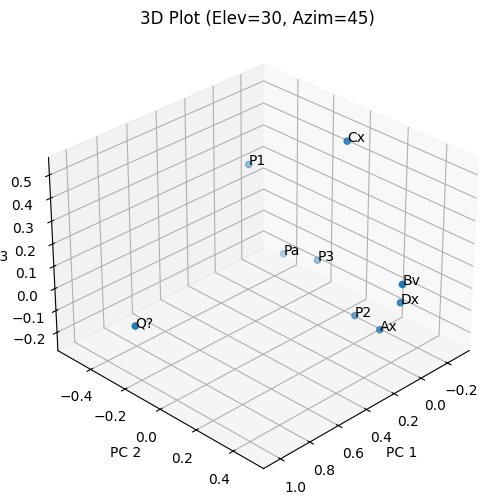

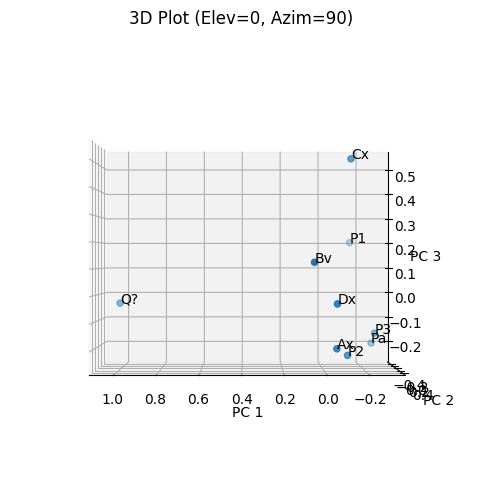

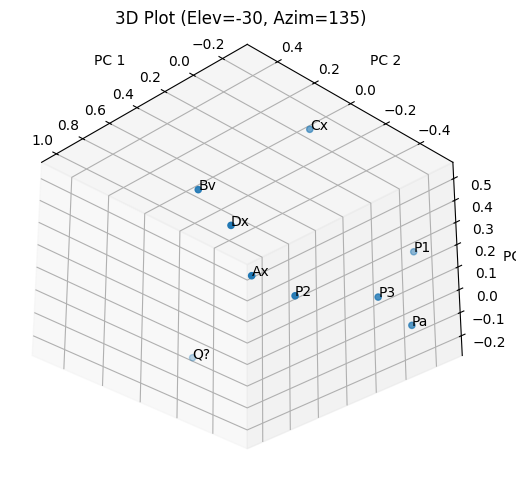

In [13]:
# Reduce to 3 dimensions using PCA
pca_3d = PCA(n_components=3)
reduced_embeddings_3d = pca_3d.fit_transform(embeddings)

#Create various angles for multiple 3-D rendering
elevations = [30, 30, 0, -30]  # Angles of elevation
azim_angles = [0, 45, 90, 135] # Azimuthal angles

for i, (elev, azim) in enumerate(zip(elevations, azim_angles)):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2])
    for j, txt in enumerate(sentences):
        ax.text(reduced_embeddings_3d[j, 0], reduced_embeddings_3d[j, 1], reduced_embeddings_3d[j, 2], txt[:2])
    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.set_zlabel("PC 3")
    ax.view_init(elev=elev, azim=azim)
    plt.title(f"3D Plot (Elev={elev}, Azim={azim})")
    plt.show()

## 7. Using t-SNE for Dimensionality Reduction

**t-SNE** = t-distributed stochastic neighbor embedding. Unlike PCA, it demonstrate the embedding in non-linear relationships.


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



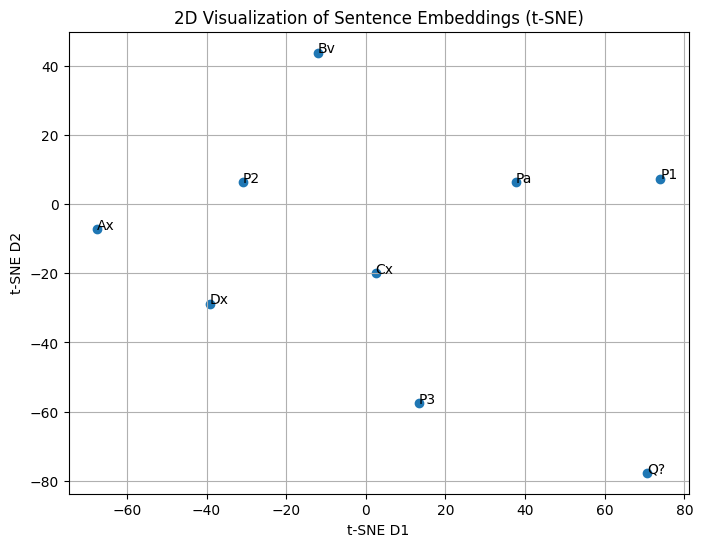

In [59]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce to 2 dimensions using t-SNE with a lower perplexity
tsne_2d = TSNE(n_components=2, random_state=42, n_iter=300, perplexity=min(5, len(sentences) - 1)) # Set perplexity <= 5 or n_samples - 1
reduced_embeddings_tsne_2d = tsne_2d.fit_transform(embeddings)

# Visualize the 2D embeddings (t-SNE)
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings_tsne_2d[:, 0], reduced_embeddings_tsne_2d[:, 1])

# Annotate each point with the corresponding sentence
for i, txt in enumerate(sentences):
    plt.annotate(txt[:2], (reduced_embeddings_tsne_2d[i, 0], reduced_embeddings_tsne_2d[i, 1]))

plt.title("2D Visualization of Sentence Embeddings (t-SNE)")
plt.xlabel("t-SNE D1")
plt.ylabel("t-SNE D2")
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



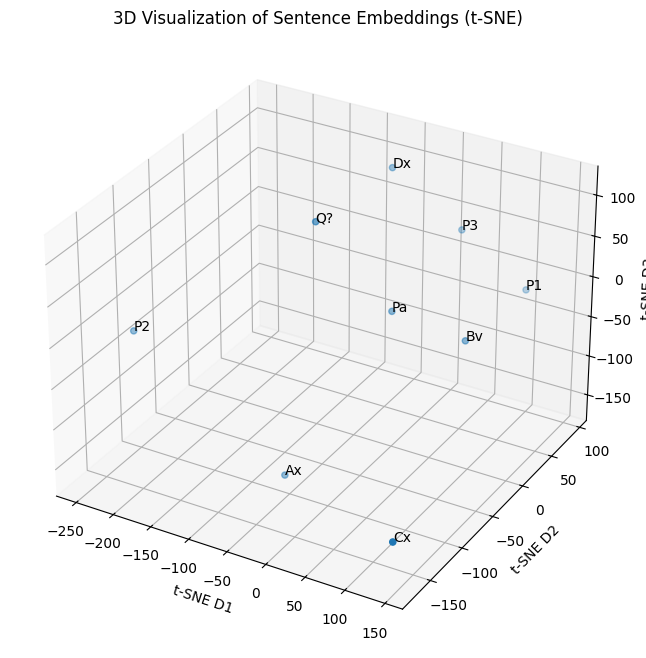

In [60]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3 dimensions using t-SNE with a lower perplexity
tsne_3d = TSNE(n_components=3, random_state=42, n_iter=300, perplexity=min(5, len(sentences) - 1))
reduced_embeddings_tsne_3d = tsne_3d.fit_transform(embeddings)

# Visualize the 3D embeddings
fig_3d = plt.figure(figsize=(10, 8))
ax_3d = fig_3d.add_subplot(111, projection='3d')
scatter_3d = ax_3d.scatter(reduced_embeddings_tsne_3d[:, 0], reduced_embeddings_tsne_3d[:, 1], reduced_embeddings_tsne_3d[:, 2])

# Annotate each point with the first letter of the sentence
for i, txt in enumerate(sentences):
    ax_3d.text(reduced_embeddings_tsne_3d[i, 0], reduced_embeddings_tsne_3d[i, 1], reduced_embeddings_tsne_3d[i, 2], txt[:2])

ax_3d.set_xlabel("t-SNE D1")
ax_3d.set_ylabel("t-SNE D2")
ax_3d.set_zlabel("t-SNE D3")
ax_3d.set_title("3D Visualization of Sentence Embeddings (t-SNE)")
plt.show()

In [61]:
import plotly.graph_objects as go
from sklearn.manifold import TSNE
import numpy as np

# Reduce to 3 dimensions using t-SNE with a lower perplexity
tsne_3d = TSNE(n_components=3, random_state=42, n_iter=300, perplexity=min(5, len(sentences) - 1))
reduced_embeddings_tsne_3d = tsne_3d.fit_transform(embeddings)

# Create the 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=reduced_embeddings_tsne_3d[:, 0],
    y=reduced_embeddings_tsne_3d[:, 1],
    z=reduced_embeddings_tsne_3d[:, 2],
    mode='markers+text',
    text=labels,
    textposition="middle right",
    marker=dict(size=8),
)])

# Set the title and axis labels
fig.update_layout(
    title="3D t-SNE Visualization",
    scene=dict(
        xaxis_title="t-SNE Dimension 1",
        yaxis_title="t-SNE Dimension 2",
        zaxis_title="t-SNE Dimension 3",
    ),
    margin=dict(l=0, r=0, b=0, t=0),
)

# Show the plot
fig.show()



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



## 8. How about 5-Vs?

### 8.1 Initialized 5V (CL 1wk + DR 1wk)

Below is a typical preception with inital training/ While erros exist across V2/V3/V4/V5, the student can vaguely see the correct answer Bv from the wrong choices Ax, Cx, and Dx.

5Vs---Pa---P1---P2---P3---Q?---Ax---Bv---Cx---Dx---

V1-----0-----1-----0------0-----1------0-----1-----0-----1---

V2-----1-----0----0.5---1------0-----0----0.5----0-----0---

V3-----1-----0----0.5---1-----1------1-----1-----1-----1---

V4-----0-----1-----0-----0-----1------0-----1----0.5----1---

V5-----0-----1-----0----0.5----0------0-----0-----0-----1---

In [29]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,0
P1,0,0,0,1,1
P2,0,0.5,0.5,0,0
P3,0,1,1,0,0.5
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0.5,1,1,0
Cx,0,0,1,0.5,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA (exclude the 'datapoint' column)
X = df.iloc[:, 1:].values  # Get values from columns V1 to V5

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Get the indices of P1, P2, P3, and Q?
p1_index = labels.index('P1')
p2_index = labels.index('P2')
p3_index = labels.index('P3')
q_index = labels.index('Q?')

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_data[p1_index]
p2_coords = reduced_data[p2_index]
p3_coords = reduced_data[p3_index]
q_coords = reduced_data[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the 3D scatter plot for all points
scatter = go.Scatter3d(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    z=reduced_data[:, 2],
    mode='markers+text',
    text=labels,
    textposition="middle right",
    marker=dict(size=8),
    name='Data Points'  # Add a name for the scatter plot
)

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}' # Add a name for each line.
        )
    )

# Combine scatter and lines
data = [scatter] + lines

# Set the title and axis labels
layout = go.Layout(
    title="3D PCA of Data with Tetrahedron",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=True #show legend
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot (this will display an interactive plot in Colab)
fig.show()


### 8.2 Well-Trained 5Vs: CL 1wk + DP/BT>=1month

Below is a typical preception with 1+month training. Correct answer falls directly into the prompt/question subspace.

5Vs---Pa---P1---P2---P3---Q?---Ax---Bv---Cx---Dx---

V1-----0-----1-----0------0-----1------0-----1-----0-----1---

V2-----1-----0-----1-----1------0-----0-----0-----0-----0---

V3-----1-----0-----1-----1-----1------1-----1-----1-----1---

V4-----0-----1-----0-----0-----1------0-----1-----1-----1---

V5-----0-----1-----0-----1-----0------0-----0-----0-----1---

In [62]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from sklearn.decomposition import PCA

# Your data as a string (including header row)
data_string = """datapoint,V1,V2,V3,V4,V5
Pa,0,1,1,0,1
P1,1,0,0,1,1
P2,0,1,1,0,0
P3,0,1,1,0,1
Q?,1,0,1,1,0
Ax,0,0,1,0,0
Bv,1,0,1,1,0
Cx,0,0,1,1,0
Dx,1,0,1,1,1
"""

# Load the data from the string into a Pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data_string))

# Extract the data for PCA (exclude the 'datapoint' column)
X = df.iloc[:, 1:].values  # Get values from columns V1 to V5

# Extract the datapoint labels
labels = df['datapoint'].tolist()

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X)

# Get the indices of P1, P2, P3, and Q?
p1_index = labels.index('P1')
p2_index = labels.index('P2')
p3_index = labels.index('P3')
q_index = labels.index('Q?')

# Extract the 3D coordinates of P1, P2, P3, and Q?
p1_coords = reduced_data[p1_index]
p2_coords = reduced_data[p2_index]
p3_coords = reduced_data[p3_index]
q_coords = reduced_data[q_index]

# Define the vertices of the tetrahedron
tetrahedron_vertices = np.array([p1_coords, p2_coords, p3_coords, q_coords])

# Define the edges of the tetrahedron (indices of vertices)
tetrahedron_edges = [
    (0, 1), (0, 2), (0, 3),  # Edges from P1 to P2, P3, Q?
    (1, 2), (1, 3),          # Edges from P2 to P3, Q?
    (2, 3)                   # Edge from P3 to Q?
]

# Create the 3D scatter plot for all points
scatter = go.Scatter3d(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    z=reduced_data[:, 2],
    mode='markers+text',
    text=labels,
    textposition="middle right",
    marker=dict(size=8),
    name='Data Points'  # Add a name for the scatter plot
)

# Create the lines for the tetrahedron edges
lines = []
for i, (start_index, end_index) in enumerate(tetrahedron_edges):
    start_point = tetrahedron_vertices[start_index]
    end_point = tetrahedron_vertices[end_index]
    lines.append(
        go.Scatter3d(
            x=[start_point[0], end_point[0]],
            y=[start_point[1], end_point[1]],
            z=[start_point[2], end_point[2]],
            mode='lines',
            line=dict(color='red', width=4),  # Style the lines
            name=f'Edge {i+1}' # Add a name for each line.
        )
    )

# Combine scatter and lines
data = [scatter] + lines

# Set the title and axis labels
layout = go.Layout(
    title="3D PCA of Data with Tetrahedron",
    scene=dict(
        xaxis_title="PC 1",
        yaxis_title="PC 2",
        zaxis_title="PC 3",
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    showlegend=True #show legend
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the plot (this will display an interactive plot in Colab)
fig.show()
